In [3]:
#nbi:hide_in
#nbi:hide_out

#from ipywidgets import interact, interactive, widgets
from IPython.display import display, Image
import pandas as pd
#import matplotlib.image as img
#import matplotlib.pyplot as plt

In [6]:
def pred_num_jour(pds, race, saison):
    data_nom = saison + "_" + race + ".csv"
    data = pd.read_csv(data_nom, sep=";", decimal = ",")
    
    for i,p in enumerate(data["pdsab_calc"]):
        if pds > p :
            if i == 0 :
                return "Les abeilles sont mortes entre hier et aujourd'hui"
            
            else :
                dist_j = pds - p 
                dist_j1 = data["pdsab_calc"][i-1] - pds
                
                if dist_j <= dist_j1 :
                    return "Les abeilles sont mortes depuis " + str(data["num_jour"][i]) + " jours"
                
                else :
                    return "Les abeilles sont mortes depuis " + str(data["num_jour"][i-1]) + " jours"
                
    return "Les abeilles sont mortes il y a plus de 30 jours"

In [7]:
pred_num_jour(100.5, "noire", "printemps")

'Les abeilles sont mortes depuis 5 jours'

In [1]:
def affiche_graphe(race, saison):
    image_nom = saison + "_" + race + ".png"
    display(Image(filename=image_nom))
    return 0

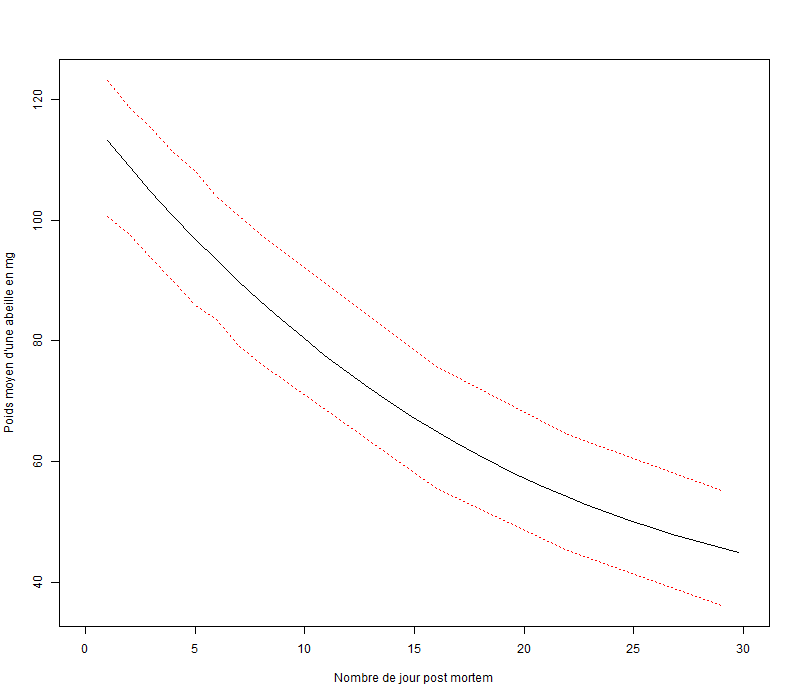

0

In [4]:
affiche_graphe("noire", "printemps")